In [9]:
import pandas as pd
import numpy as np

In [10]:
df_gephi = pd.read_csv("./gephi_graphs/modularity_classes.csv")
df_gephi = df_gephi.rename(columns={"Label":"label", "Modularity Class":"modularity_class"})
df_roc = pd.read_csv("./../models/models/best_model_test/test_metrics_indiv.csv")
df_roc = df_roc.rename(columns={"Unnamed: 0":"label"})

In [11]:
# merge on label
df_roc = df_roc.merge(df_gephi, on="label", how="left")
df_roc = df_roc.sort_values(by="roc_auc", ascending=False).reset_index(drop=True)

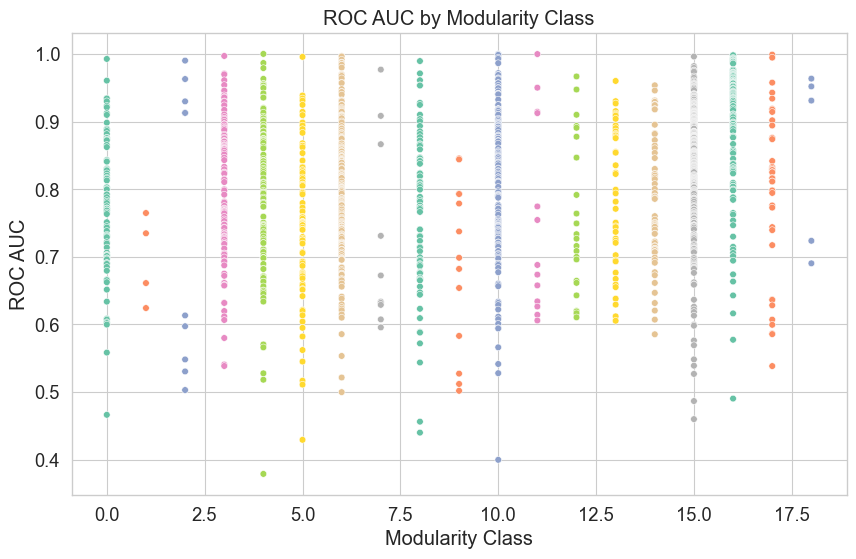

In [12]:
# plot with y axis roc_auc and x axis modularity class
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(x="modularity_class", y="roc_auc", data=df_roc, hue="modularity_class", palette="Set2")
plt.xlabel("Modularity Class")
plt.ylabel("ROC AUC")
plt.title("ROC AUC by Modularity Class")

# hide legend
plt.legend([],[], frameon=False)

plt.show()

In [13]:
df_roc.tail(20)

,label,roc_auc,avg_prec,modularity_class
1520,activate,0.527547,0.008594,4.0
1521,suppression,0.527092,0.002345,9.0
1522,dry,0.526680,0.001053,15.0
1523,stem,0.521357,0.019312,6.0
1524,chronic,0.518074,0.003851,4.0
1525,cerebrovascular,0.516643,0.500104,5.0
1526,medication,0.511865,0.000910,9.0
1527,enhancement,0.510868,0.002583,5.0
1528,acceptable,0.502843,0.001635,2.0
1529,promote,0.501718,0.000777,9.0


In [15]:
from ast import literal_eval
from collections import Counter
df = pd.read_csv("./../../results/schembl_summs_v5_final.csv")
df["summarizations"] = df["summarizations"].apply(literal_eval).apply(set)
counter = Counter()
for i in df["summarizations"]:
    counter.update(i)

In [16]:
df_roc["counts"] = df_roc["label"].apply(lambda x: counter[x])

/var/folders/67/6sj3_z4943v4gy9hc27k5vv80000gq/T/ipykernel_16130/3233677504.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="counts", y="roc_auc", data=df_roc, palette="Set2")


Text(0, 0.5, 'ROC AUC')

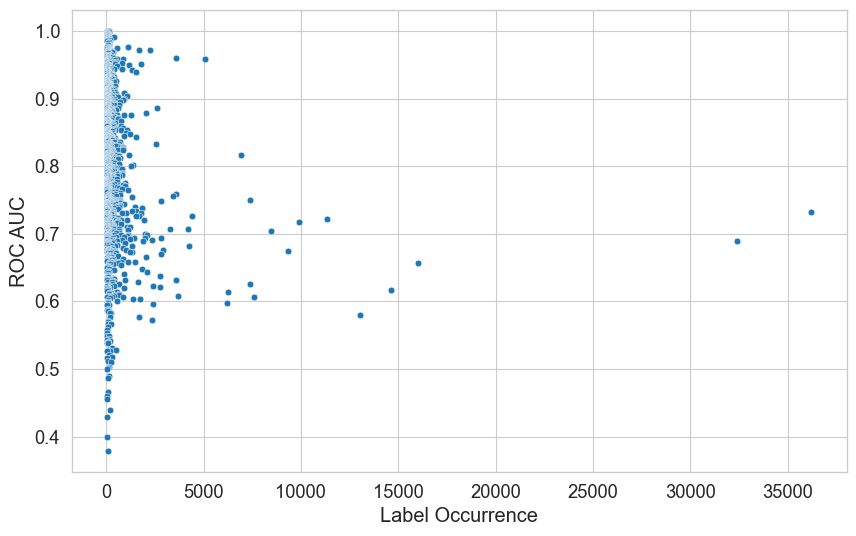

In [28]:
# plot distribution of counts by roc_auc
plt.figure(figsize=(10, 6))
sns.scatterplot(x="counts", y="roc_auc", data=df_roc, palette="Set2")
plt.xlabel("Label Occurrence")
plt.ylabel("ROC AUC")

In [34]:
print(df_roc[df_roc["label"] == "serotonin"])
print(df_roc[df_roc["label"] == "5-ht"])

         label   roc_auc  avg_prec  modularity_class  counts
805  serotonin  0.810466  0.087804              10.0     586
    label   roc_auc  avg_prec  modularity_class  counts
529  5-ht  0.867371  0.138086              10.0     744


In [31]:
df_roc.tail(30)

,label,roc_auc,avg_prec,modularity_class,counts
1510,processes,0.548080,0.002069,2.0,132
1511,na,0.544972,0.001879,5.0,130
1512,fat,0.543544,0.000819,8.0,50
1513,gaba,0.541365,0.003033,10.0,221
1514,microbiological,0.540577,0.005398,3.0,85
1515,bleach,0.538838,0.000469,15.0,43
1516,tolerance,0.538384,0.001875,3.0,92
1517,antiplatelet,0.538290,0.004167,17.0,70
1518,formulation,0.530336,0.002956,2.0,325
1519,feed,0.527764,0.001458,10.0,90


In [30]:
# count average count of labels below 0.6 roc auc
print(df_roc[df_roc["roc_auc"] < 0.50]["counts"].mean())
print(df_roc[df_roc["roc_auc"] > 0.50]["counts"].mean())
print(df_roc[df_roc["roc_auc"] > 0.90]["counts"].mean())
print(df_roc["counts"].mean())


88.9
405.37450980392157
197.6067415730337
403.3194805194805
